In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False



import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
import matplotlib
matplotlib.rcParams['svg.fonttype'] = 'none'


In [3]:
figdir = '/mnt/home/szheng/ceph/place_variability/fig/paper/figure_location_drift'
misc.get_or_create_subdir(figdir)
suppfigdir = '/mnt/home/szheng/ceph/place_variability/fig/paper/figure_location_drift/supp'
misc.get_or_create_subdir(suppfigdir)
data_dir = '/mnt/home/szheng/ceph/place_variability/data/paper'
misc.get_or_create_subdir(data_dir)

'/mnt/home/szheng/ceph/place_variability/data/paper'

In [4]:
import database
db = database.db

subdb = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
subdb = subdb.query('ntrials>=20&n_neurons>=50')
to_exclude_sess = ['e16_3m2_211211']
subdb=subdb.loc[~subdb['sess_name'].isin(to_exclude_sess)]


import pf_recombine_central as pfrc
import fr_map_one_session as fmos
import switch_detection_one_session as sdos
import get_all_switch_add_metrics as gasam

import preprocess_one_session as prepos

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [6]:
fn = 'prepped_data_agg.p'
fn_full = os.path.join(data_dir,fn)
prepped_data_agg = pickle.load(open(fn_full,'rb'))

all_fields_recombined_all = prepped_data_agg['all_fields_recombined_all']
pf_params_recombined_all=  prepped_data_agg['pf_params_recombined_all']
fr_map_trial_df_all= prepped_data_agg['fr_map_trial_df_all']
pval_all = prepped_data_agg['pval_all']
X_pwc_all = prepped_data_agg['X_pwc_all']
X_raw_all = prepped_data_agg['X_raw_all']
changes_df_all = prepped_data_agg['changes_df_all']
var_res_all = prepped_data_agg['var_res_all']
corr_all = prepped_data_agg['corr_all']
all_sw_d_all = prepped_data_agg['all_sw_d_all']
all_sw_with_metrics_d_all = prepped_data_agg['all_sw_with_metrics_d_all']
best_n_all = prepped_data_agg['best_n_all']
spk_beh_df_all = prepped_data_agg['spk_beh_df_all']



ntrials_per_tt=fr_map_trial_df_all.groupby(level=(0,1,2,3)).apply(lambda x:x.dropna(axis=1,how='all').shape[1])

ntrials_mask = ntrials_per_tt.groupby(level=(0,1,2)).apply(lambda x:(x>=7).all()) 

In [7]:
fr_map_all=prepped_data_agg['fr_map_all']

In [8]:
# load metrics
import pickle
savefn_full = os.path.join(data_dir,'per_field_metrics_shtest_with_1cp.p')
# pickle.dump(per_field_metrics_all,open(savefn_full,'wb'))
per_field_metrics_all=pickle.load(open(savefn_full,'rb'))

In [9]:
import stability_analysis as sa
reload(sa)

<module 'stability_analysis' from '/mnt/home/szheng/projects/place_variability/code/stability_analysis.py'>

In [10]:
all_fields_all=prepped_data_agg['all_fields_all']

# simulate some data

In [168]:
n_neuron = 200
n_pos = 100
n_trial = 10
rate_start = np.exp(np.random.normal(size=n_neuron))
# rate_step = 0.5 * rate_start
rate_step_sc = 0.5
rate_step = rate_step_sc * rate_start
rate_per_trial = [rate_start]

loc_start = np.linspace(0,n_pos-1,n_neuron)
loc_per_trial = [loc_start]
loc_step = 1

for n in range(1,n_trial):
    rate_next = rate_per_trial[n-1] + rate_step * np.random.normal(size=n_neuron) 
    rate_next[rate_next<0] = 0
    rate_per_trial.append(rate_next)
    
    loc_next = loc_per_trial[n-1] + loc_step * np.random.normal(size=n_neuron)
    loc_next[loc_next<0] = 0
    loc_next[loc_next>n_pos-1] = n_pos-1
    loc_per_trial.append(loc_next)
    

loc_per_trial = np.array(loc_per_trial).T
rate_per_trial = np.array(rate_per_trial).T

ratemap_allp=gen_ratemap_one(loc_per_trial,rate_per_trial,width,n_pos)

ratemap_allreshape=ratemap_allp.reshape(-1,n_trial)
ratemap_allreshape=pd.DataFrame(ratemap_allreshape)
ind = pd.MultiIndex.from_product([np.arange(n_neuron),np.arange(n_pos)])
ratemap_allreshape.index=ind
ratemap_df =ratemap_allreshape


In [195]:
def gen_sim(n_neuron = 200,
            n_pos = 100,
            n_trial = 20,
            rate_step_sc = 0.5,
            loc_step = 1
           ):
    
    rate_start = np.exp(np.random.normal(size=n_neuron))
    # rate_step = 0.5 * rate_start

    rate_step = rate_step_sc * rate_start
    rate_per_trial = [rate_start]

    loc_start = np.linspace(0,n_pos-1,n_neuron)
    loc_per_trial = [loc_start]


    for n in range(1,n_trial):
        rate_next = rate_per_trial[n-1] +  rate_step * np.random.normal(size=n_neuron) 
        rate_next[rate_next<0] = 0
        rate_per_trial.append(rate_next)

        loc_next = loc_per_trial[n-1] + loc_step * np.random.normal(size=n_neuron)
        loc_next[loc_next<0] = 0
        loc_next[loc_next>n_pos-1] = n_pos-1
        loc_per_trial.append(loc_next)


    loc_per_trial = np.array(loc_per_trial).T
    rate_per_trial = np.array(rate_per_trial).T

    ratemap_allp=gen_ratemap_one(loc_per_trial,rate_per_trial,width,n_pos)

    ratemap_allreshape=ratemap_allp.reshape(-1,n_trial)
    ratemap_allreshape=pd.DataFrame(ratemap_allreshape)
    ind = pd.MultiIndex.from_product([np.arange(n_neuron),np.arange(n_pos)])
    ratemap_allreshape.index=ind
    ratemap_df =ratemap_allreshape
    
    return ratemap_df, rate_per_trial, loc_per_trial
    
    




In [208]:
n_repeat = 10
slope_all = {}
sweep_key = 'loc_step'#'rate_step_sc'
sweep_vals = [0,0.5,1,1.5,2,2.5,5]
for sv in sweep_vals:
    for r in range(n_repeat):
        ratemap_df, rate_per_trial, loc_per_trial = gen_sim(**{sweep_key:sv})
        corr_per_lag =pvca.get_val_per_lag(ratemap_df.corr())
        slope_one = pvca.get_decay_slope_linregress(corr_per_lag)
        slope_all[(sv,r)] = slope_one
slope_all = pd.Series(slope_all).unstack(level=-1)

In [203]:
slope_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
5,-0.034958,-0.047983,-0.031319,-0.028782,-0.024812,-0.037931,-0.027873,-0.036355,-0.03483,-0.036441,-0.032386,-0.027677,-0.027818,-0.041011,-0.028032,-0.037584,-0.026572,-0.029133,-0.036077,-0.030464


Text(0, 0.5, 'PV decorr slope')

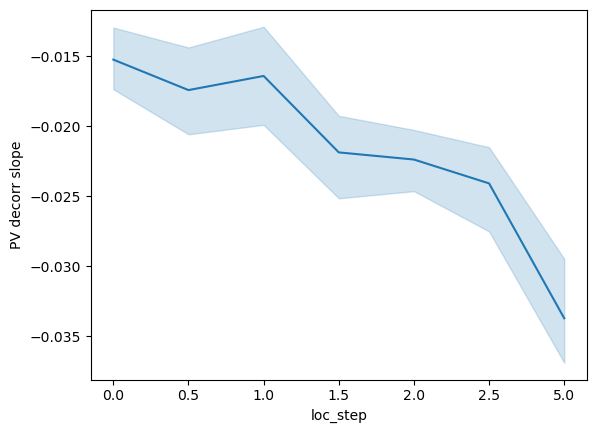

In [209]:
fig,ax=ph.mean_across_row_vs_col_with_err(slope_all.T)
ax.set_xticks(np.arange(len(slope_all.index)))
ax.set_xticklabels(slope_all.index)
ax.set_xlabel(f'{sweep_key}')
ax.set_ylabel('PV decorr slope')

In [210]:
n_repeat = 10
slope_all = {}
sweep_key = 'rate_step_sc'
sweep_vals = [0,0.5,1,1.5,2,2.5,5]
for sv in sweep_vals:
    for r in range(n_repeat):
        ratemap_df, rate_per_trial, loc_per_trial = gen_sim(**{sweep_key:sv})
        corr_per_lag =pvca.get_val_per_lag(ratemap_df.corr())
        slope_one = pvca.get_decay_slope_linregress(corr_per_lag)
        slope_all[(sv,r)] = slope_one
slope_all = pd.Series(slope_all).unstack(level=-1)

In [221]:
def gen_sim_plot(**kwargs):
    ratemap_df, rate_per_trial, loc_per_trial = gen_sim(**kwargs)
    corr_per_lag =pvca.get_val_per_lag(ratemap_df.corr())
    
    rate_corr=pd.DataFrame(rate_per_trial).corr()
    rate_corr_per_lag = pvca.get_val_per_lag(rate_corr)
    
    loc_corr=pd.DataFrame(loc_per_trial).corr()
    loc_corr_per_lag = pvca.get_val_per_lag(loc_corr)
    
    fig,axs=plt.subplots(1,3,sharey=True)
    ax=axs[0]
    fig,ax=ph.mean_across_row_vs_col_with_err(corr_per_lag,ax=ax)
    ax.set_xlabel('Trial lag')
    ax.set_ylabel('PV corr')
    
    ax=axs[1]
    fig,ax=ph.mean_across_row_vs_col_with_err(loc_corr_per_lag,ax=ax)
    ax.set_xlabel('Trial lag')
    ax.set_ylabel('Loc corr')
    
    ax=axs[2]
    fig,ax=ph.mean_across_row_vs_col_with_err(rate_corr_per_lag,ax=ax)
    ax.set_xlabel('Trial lag')
    ax.set_ylabel('Rate corr')
    plt.tight_layout()
    
    return corr_per_lag, rate_corr_per_lag, loc_corr_per_lag

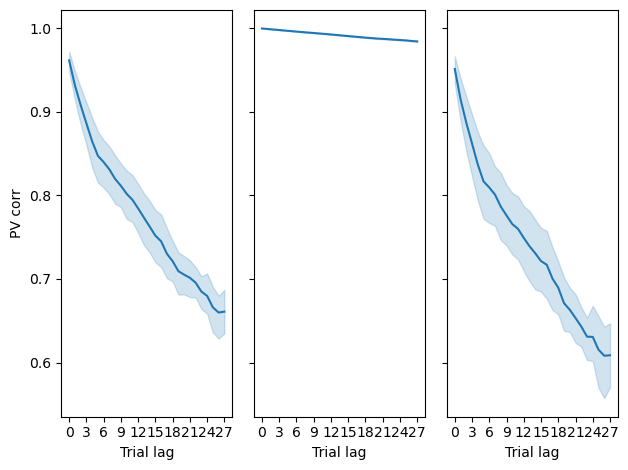

In [223]:
corr_per_lag, rate_corr_per_lag, loc_corr_per_lag = gen_sim_plot(n_trial=30)

Text(0, 0.5, 'PV decorr slope')

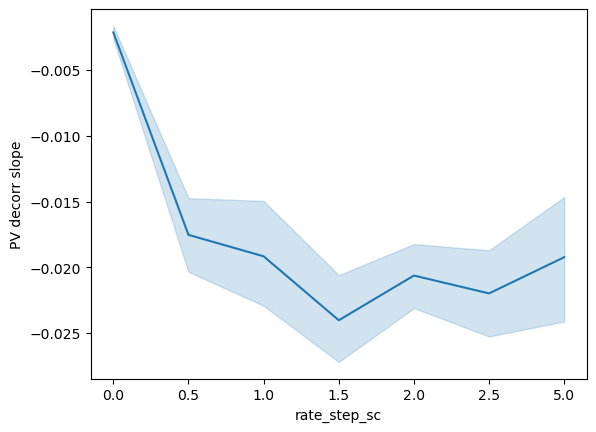

In [211]:
fig,ax=ph.mean_across_row_vs_col_with_err(slope_all.T)
ax.set_xticks(np.arange(len(slope_all.index)))
ax.set_xticklabels(slope_all.index)
ax.set_xlabel(f'{sweep_key}')
ax.set_ylabel('PV decorr slope')

In [170]:
width = 10
def gen_ratemap_one(loc,rate,width,n_pos=100):
    ratemap_allp = []
    for p in range(n_pos):
        ratemap=scipy.stats.norm.pdf(p,loc=loc,scale=width)*rate
        ratemap_allp.append(ratemap)
    ratemap_allp = np.stack(ratemap_allp,axis=1)
    return ratemap_allp
    
    

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Trial', ylabel='value'>)

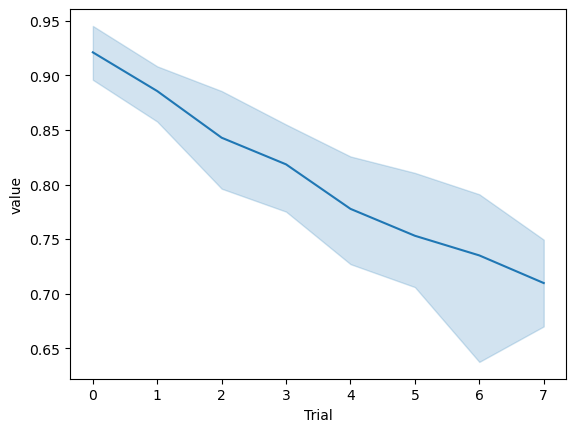

In [173]:
import pv_corr_analysis as pvca
corr_per_lag =pvca.get_val_per_lag(ratemap_df.corr())
ph.mean_across_row_vs_col_with_err(corr_per_lag)

In [175]:
slope_one = pvca.get_decay_slope_linregress(corr_per_lag)

In [176]:
slope_one

-0.03167830107055786

In [174]:
corr_per_lag

,1,2,3,4,5,6,7,8
0,0.855112,0.820306,0.738875,0.727799,0.697199,0.707121,0.776669,0.669998
1,0.868895,0.828452,0.772664,0.833896,0.826998,0.821219,0.791067,0.749499
2,0.917388,0.903867,0.828004,0.825036,0.820677,0.704938,0.637477,NaN
3,0.936487,0.902301,0.914198,0.875957,0.826980,0.779018,NaN,NaN
4,0.904547,0.899157,0.868150,0.772706,0.716758,NaN,NaN,NaN
5,0.961810,0.912189,0.897263,0.875585,NaN,NaN,NaN,NaN
6,0.939818,0.919587,0.881245,NaN,NaN,NaN,NaN,NaN
7,0.932413,0.899315,NaN,NaN,NaN,NaN,NaN,NaN
8,0.973965,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
ratemap_allp.shape

(200, 100, 10)

In [25]:
loc_per_trial[0]

array([0.        , 0.03335109, 0.08406125, 0.31389103, 0.44018947,
       0.3032572 , 0.26681841, 0.31252028, 0.48986701, 0.46002002])

# can we classify the degree of location drift?

In [211]:
loc_all = pf_params_all.loc[(slice(None),slice(None),slice(None),slice(None),'peak')]
for i,row in loc_all.iterrows():
    row = row.dropna()
    row.reset_index().rcorr()

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/sta

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/sta

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [251]:
row.name

('e14_2m2', 'e14_2m2_201019', 0, 1.0, 89, 1)

/tmp/ipykernel_702312/245412402.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  rm = fr_map_trial_df_pyr_combined_all.loc[(ani,sess,ti,tt,uid),:].dropna(axis=1).T
/mnt/home/szheng/projects/util_code/plot_helper.py:578: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_tick_labels, rotation=0)


(<Figure size 216x144 with 2 Axes>, <Axes: xlabel='Position'>)

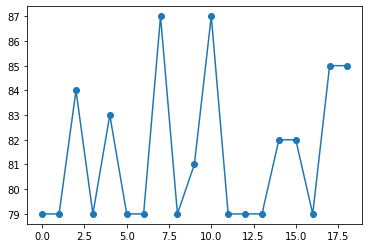

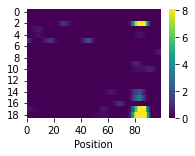

In [252]:
row=loc_all.sample(1).iloc[0].dropna()
ani,sess,ti,tt,uid,field_id = row.name
row.plot(marker='o')
rm = fr_map_trial_df_pyr_combined_all.loc[(ani,sess,ti,tt,uid),:].dropna(axis=1).T
ph.ratemap_one_raw(rm)

In [257]:
import pv_corr_analysis as pvca

In [350]:
key_l =['fr_peak','peak']
fr_peak_peak_all_unstack = pf_params_all.loc[(slice(None),slice(None),slice(None),slice(None),key_l)].unstack(level=-3)
sub=fr_peak_peak_all_unstack.sample(1).iloc[0]
ani,sess,ti,tt,uid,field_id = sub.name
sub=sub.unstack(-1).T.dropna(axis=1)

/tmp/ipykernel_702312/1431371813.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  rm = fr_map_trial_df_all.loc[(ani,sess,ti,tt,uid),:].dropna(axis=1).T
/mnt/home/szheng/projects/util_code/plot_helper.py:578: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_tick_labels, rotation=0)


(<Figure size 300x200 with 2 Axes>, <Axes: xlabel='Position'>)

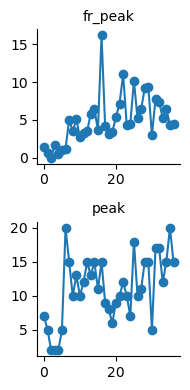

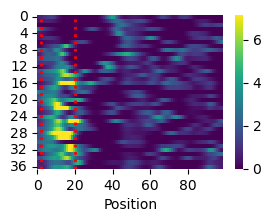

In [351]:
fig,axs=plt.subplots(2,1,figsize=(2,4))
for ii,key in enumerate(key_l):
    ax=axs[ii]
    row = sub.loc[key]
    diff_mat = pd.DataFrame(row.values[None,:] - row.values[:,None],index=row.index,columns=row.index)
    diff_mat_abs= np.abs(diff_mat)
    diff_abs_per_lag = pvca.get_val_per_lag(diff_mat_abs)
#     ph.mean_error_plot(diff_abs_per_lag,ax=ax,fig=fig)
    
    row.plot(ax=ax,marker='o')
    
    ax.set_title(key)
    sns.despine()
plt.tight_layout()
rm = fr_map_trial_df_all.loc[(ani,sess,ti,tt,uid),:].dropna(axis=1).T

st,ed = all_fields_all.loc[ani,sess,ti,tt,uid,field_id][['start','end']]

ph.ratemap_one_raw(rm,field_bound=(st,ed))


(<Figure size 640x480 with 1 Axes>, <Axes: >)

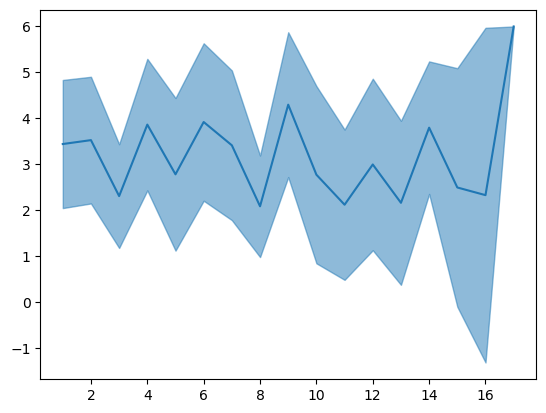

In [261]:
ph.mean_error_plot(diff_abs_per_lag)

In [ ]:
row.plot()

# does field within a neuron drift together [keep for sup]

In [107]:
pf_params_all = prepped_data_agg['pf_params_all']

In [152]:
si_per_cell_ma = (per_field_metrics_all['si'] > 1).groupby(level=(0,1,2,4)).any()

In [163]:
key_corr_all = {}
do_ma = False#True# # masking doesn't matter in the end use no mask
si_per_cell_ma = (per_field_metrics_all['si'] > 1).groupby(level=(0,1,2,4)).any()
for fr_loc_key in ['peak','fr_peak']:

    loc_key = fr_loc_key#'peak'
    # loc_all = pf_params_recombined_all.loc[(slice(None),slice(None),loc_key),:].droplevel(2)
    loc_all = pf_params_all.loc[(slice(None),slice(None),slice(None),slice(None),loc_key),:].droplevel(4)
    
    if do_ma:
        loc_all = loc_all.reset_index(level=(3,5)).loc[si_per_cell_ma].set_index(['level_3','level_5'],append=True).swaplevel(-2,-3)


    gpb = loc_all.groupby(level=(0,1,2,3,4),sort=False)
    loc_corr_all = {}
    for k,val in gpb:
        ani,sess,ti,tt,uid=k
        if val.shape[0]>1:
            corr_mat = val.T.corr()
            avg = corr_mat.values[np.triu_indices_from(corr_mat,k=1)]
            avg = np.mean(avg)
            loc_corr_all[k] = avg
    loc_corr_all = pd.Series(loc_corr_all)
    key_corr_all[fr_loc_key] =loc_corr_all
key_corr_all = pd.concat(key_corr_all,axis=1)

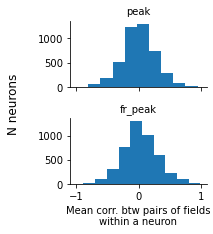

In [164]:
fig,axs=plt.subplots(2,1,figsize=(3,3),sharex=True)
for ii,key in enumerate(key_corr_all.columns):
    ax=axs[ii]
    ax.hist(key_corr_all[key])
    ax.set_title(key)
    sns.despine()
fig.supylabel('N neurons')
plt.tight_layout()
ax.set_xlabel('Mean corr. btw pairs of fields\nwithin a neuron')

figfn = 'mean_corr_between_pairs_of_fields_within_a_neuron_all'
ph.save_given_name(fig,figfn,suppfigdir)

# create fake data one

In [14]:
sess='e15_13f1_220117'
ani = 'e15_13f1'

In [17]:
gpb = fr_map_trial_df_all.groupby(level=(0,1,2,3,4),sort=False)
for k,val in gpb:
    ani,sess,ti,tt,uid = k

In [204]:
row=per_field_metrics_all.query('si>1').sample(1).iloc[0]
ani,sess,ti,tt,uid,field_id = row.name

In [205]:
pf_params_one_cell=pf_params_all.loc[(ani,sess,ti,tt,slice(None),uid),:].droplevel((0,1,2,3,5)).dropna(axis=1,how='all')
pf_params_one_field = pf_params_one_cell.loc[(slice(None),0),:].droplevel(1)


/tmp/ipykernel_702312/4275043696.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  rm = fr_map_trial_df_pyr_combined_all.loc[(ani,sess,ti,tt,uid),:].dropna(axis=1).T
/mnt/home/szheng/projects/util_code/plot_helper.py:578: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_tick_labels, rotation=0)


(<Figure size 216x144 with 2 Axes>, <Axes: xlabel='Position'>)

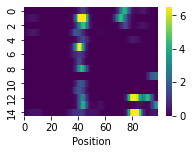

In [207]:
rm = fr_map_trial_df_pyr_combined_all.loc[(ani,sess,ti,tt,uid),:].dropna(axis=1).T
ph.ratemap_one_raw(rm)

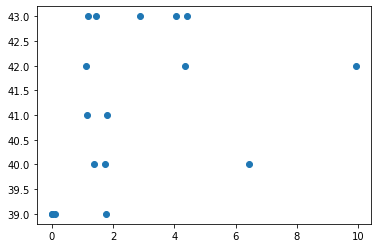

In [206]:
fig,ax=plt.subplots()
ax.scatter(pf_params_one_field.loc['fr_peak'],pf_params_one_field.loc['peak'])

In [75]:
def gen_ratemap_one_field(fr_peak=None,peak=None,std=None,pos_l=None,**kwargs):
    if pos_l is None:
        pos_l = np.arange(99)
    pdf = scipy.stats.norm(loc=peak,scale=std).pdf(pos_l)
    rate_one = pdf * fr_peak / pdf.max()
    return rate_one

def gen_ratemap_one_neuron_all_trial(fr_peak_l, peak_l, std_l,pos_l=None,**kwargs):
    
    
    

In [ ]:
scipy.stats.norm(loc=)

In [66]:
fr_map_trial_df_pyr_combined_all=prepped_data_agg['fr_map_trial_df_pyr_combined_all']

In [69]:
info_trial

com        82.601756
fr_mean     0.352228
fr_peak     1.471818
peak       81.000000
std         1.633189
Name: 1, dtype: float64

/tmp/ipykernel_702312/1128643532.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  ph.heatmap(fr_map_trial_df_pyr_combined_all.loc[(ani,sess,ti,tt,uid),:].dropna(axis=1).T)
/mnt/home/szheng/projects/util_code/plot_helper.py:578: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_tick_labels, rotation=0)


(<Figure size 432x288 with 2 Axes>, <Axes: xlabel='Position'>)

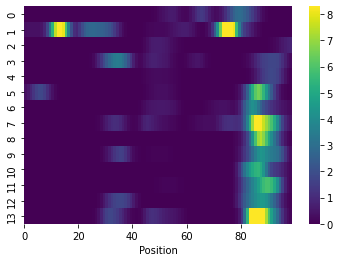

In [76]:
ph.heatmap(fr_map_trial_df_pyr_combined_all.loc[(ani,sess,ti,tt,uid),:].dropna(axis=1).T)

In [ ]:
row=all_fields_recombined_all.loc[ani,sess].iloc[4]
ti,tt,uid,field_id = row.name
print(row)



,,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
fr_mean,0,3.338543,0.011674,4.984835,0.0,1.765900,6.571861,1.684778,1.970583,2.983026,1.825949,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fr_peak,0,3.758584,0.042268,5.453244,0.0,2.114562,7.897043,2.288013,2.200551,3.900701,2.121031,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
peak,0,4.000000,4.000000,1.000000,0.0,4.000000,0.000000,4.000000,0.000000,4.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
com,0,2.096467,3.647449,1.855185,NaN,2.198308,1.758925,2.311005,1.840084,2.245855,1.776647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0,1.424163,0.636342,1.366395,NaN,1.401739,1.375531,1.404823,1.382061,1.422640,1.364198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


start                      81
end                        93
com                        86
peak                       86
fr_peak              3.306318
fr_mean              2.447959
other_field_index         NaN
Name: (0, 0.0, 4, 0), dtype: object


/tmp/ipykernel_702312/2621759181.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  row=all_fields_recombined_all.loc[ani,sess].iloc[4]
/tmp/ipykernel_702312/2621759181.py:16: PerformanceWarning: indexing past lexsort depth may impact performance.
  rm_one = fr_map_trial_df_pyr_combined_all.loc[(ani,sess,ti,tt,uid),trial_index].dropna()


<Axes: >

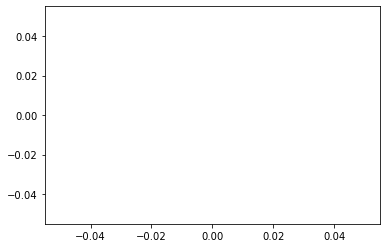

In [90]:
# information, at a trial

row=all_fields_recombined_all.loc[ani,sess].iloc[4]
ti,tt,uid,field_id = row.name
print(row)


trial_index = 15

info_trial = pf_params_recombined_all.loc[(ani,sess,slice(None),ti,tt,uid,field_id),trial_index].droplevel((0,1,3,4,5,6))

info_trial
plt.plot(gen_ratemap_one_field(**info_trial))


rm_one = fr_map_trial_df_pyr_combined_all.loc[(ani,sess,ti,tt,uid),trial_index].dropna()
rm_one.plot()


start                      81
end                        93
com                        86
peak                       86
fr_peak              3.306318
fr_mean              2.447959
other_field_index         NaN
Name: (0, 0.0, 4, 0), dtype: object


/tmp/ipykernel_702312/2591051452.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  row=all_fields_recombined_all.loc[ani,sess].iloc[4]
/tmp/ipykernel_702312/2591051452.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  rm_one = fr_map_trial_df_all.loc[(ani,sess,ti,tt,uid),tr].dropna()


<Axes: >

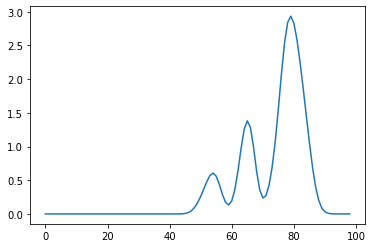

In [52]:
row=all_fields_recombined_all.loc[ani,sess].iloc[4]
ti,tt,uid,field_id = row.name
print(row)
# rm_one = fr_map_all.loc[(ani,sess,ti,tt,uid),:].dropna().T
tr = 0
rm_one = fr_map_trial_df_all.loc[(ani,sess,ti,tt,uid),tr].dropna()
rm_one.plot()


In [38]:
rm_one

lin_binned
0     6.322970
1     5.910555
2     5.214528
3     4.414810
4     3.660294
        ...   
94    7.104816
95    7.049343
96    7.273427
97    7.583415
98    7.783169
Name: (e14_2m3, e14_2m3_201118, 0, 0.0, 2.0), Length: 99, dtype: float64

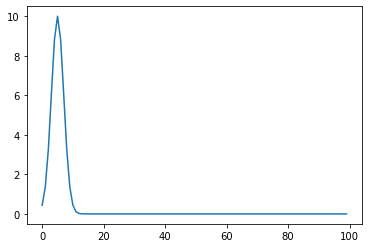

In [24]:
plt.plot(gen_ratemap_one_field(a,5,2))

In [46]:
pf_params_recombined_all.loc[(ani,sess,'std',ti,tt,uid,field_id),:]

0     1.967735
1     1.633189
2     1.188385
3          NaN
4     2.875572
        ...   
65         NaN
66         NaN
67         NaN
68         NaN
69         NaN
Name: (e14_2m3, e14_2m3_201118, std, 0, 0.0, 4, 0), Length: 70, dtype: float64